In [38]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [39]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [40]:
NUM_CLASSES = 10

# 学習データ読み込み

In [41]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [42]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [45]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [47]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [48]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 [====>.........................] - ETA: 2s - loss: 2.4693 - accuracy: 0.0625
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 1s 31ms/step - loss: 2.4878 - accuracy: 0.0845 - val_loss: 2.3511 - val_accuracy: 0.1036
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.3747 - accuracy: 0.0859
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 10ms/step - loss: 2.4259 - accuracy: 0.0754 - val_loss: 2.3212 - val_accuracy: 0.1036
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.3417 - accuracy: 0.1016
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 10ms/step - loss: 2.3847 - accuracy: 0.0814 - val_loss: 2.3046 - val_accuracy: 0.0901
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.4108 - accuracy: 0.0938
Epoch 4: sav

C:\Users\thava\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 11ms/step - loss: 2.3668 - accuracy: 0.0709 - val_loss: 2.2939 - val_accuracy: 0.0946
Epoch 5/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.3727 - accuracy: 0.1406
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 11ms/step - loss: 2.3505 - accuracy: 0.1056 - val_loss: 2.2824 - val_accuracy: 0.0766
Epoch 6/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.3095 - accuracy: 0.1250
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 10ms/step - loss: 2.3104 - accuracy: 0.1222 - val_loss: 2.2700 - val_accuracy: 0.1126
Epoch 7/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.2821 - accuracy: 0.1875
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 10ms/step - loss: 2.2855 - accuracy: 0.1599 - val_loss: 2.2581 -

In [49]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.9009


In [50]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [51]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 38ms/step
[3.8811257e-01 5.2910210e-03 1.7997287e-01 3.7829920e-03 1.8291236e-01
 4.5709206e-05 7.2505198e-02 1.0976137e-03 1.0502033e-03 1.6522950e-01]
0


# 混同行列

7/7 [==============================] - 0s 901us/step


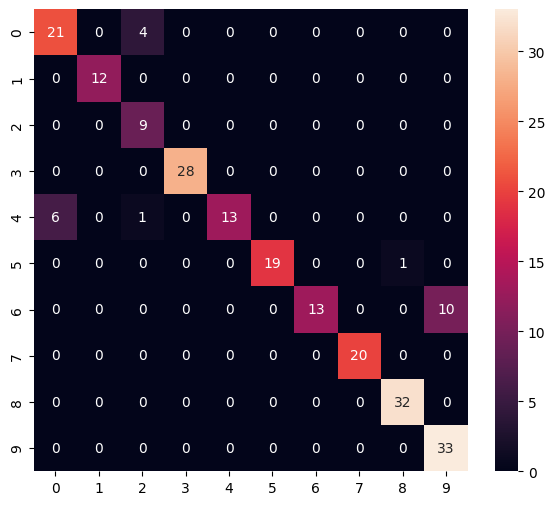

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       1.00      1.00      1.00        12
           2       0.64      1.00      0.78         9
           3       1.00      1.00      1.00        28
           4       1.00      0.65      0.79        20
           5       1.00      0.95      0.97        20
           6       1.00      0.57      0.72        23
           7       1.00      1.00      1.00        20
           8       0.97      1.00      0.98        32
           9       0.77      1.00      0.87        33

    accuracy                           0.90       222
   macro avg       0.92      0.90      0.89       222
weighted avg       0.92      0.90      0.90       222


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [53]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\thava\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\thava\AppData\Local\Temp\tmpukc3d7co\assets


INFO:tensorflow:Assets written to: C:\Users\thava\AppData\Local\Temp\tmpukc3d7co\assets


6836

# 推論テスト

In [55]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [56]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [57]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [58]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [59]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.8811266e-01 5.2910163e-03 1.7997286e-01 3.7829911e-03 1.8291236e-01
 4.5709217e-05 7.2505198e-02 1.0976141e-03 1.0502032e-03 1.6522944e-01]
0
